1. A university’s Office of Admission keeps track of student majors. Each student can
have a single major. Below is an example of how their system stores students,
majors, and how it manipulates them:
What can be concluded from the code snippet above?


(Select all acceptable answers)

A. In the update_student function, the ‘(‘ and ‘)’ parentheses can be removed
without causing any errors.

B. Calling find_students_by_name(students, ‘in’) returns a list of 2 tuples

C. The add_new_student function can be rewritten as seen below and still maintain
identical functionality:
students[len(students)] = (name, major)

D. Calling get_all_majors(students) returns a list of 3 tuples

E. The add_new_student function adds a new student in the last place in the list.

F. The name of the first student in the array can be set to the new_name variable,
like student[0][0] = new_name

## ANSWER:

## E. The add_new_student function adds a new student in the last place in the list.

2.
Two bacteria cultures, A and B, were set up in two different dishes, each covering 50% of its dish. Over 20 days, bacteria A’s percentage of coverage increased to 70% and bacteria B’s percentage of coverage reduced to 40%:
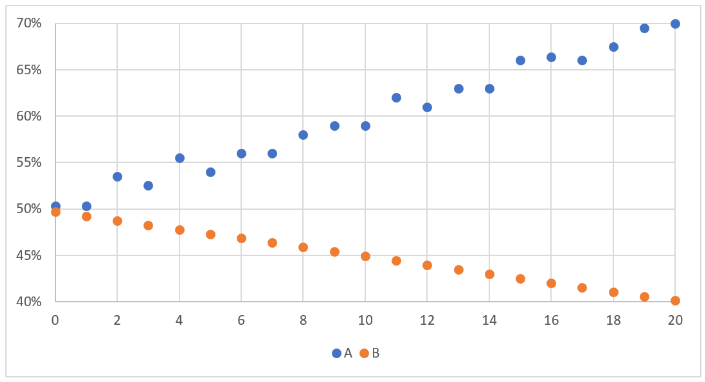

a. Which of the two bacterium’s growth correlated more linearly with the number of days passed?

- A

- B

- Cannot be determined

### ANSWER: A

b.
Approximately, what is the Pearson correlation coefficient of bacteria B’s coverage and the number of days passed?
- 1
- [0.2, 0.6]
- 0
- [-0.6, -0.2]
- -1

### ANSWER: -1

If, after 20 days, bacteria A’s coverage starts to correlate less with its linear trend line, what can we say about the value of its Pearson correlation coefficient?
- It will stay the same
- It will decrease
- It will increase
- It cannot be determined.

### ANSWER: It will decrease

3. Below is the data from a classifier model that predicts if an image contains a dog:

Dog is on image,Classifier prediction

TRUE,91
TRUE,23
TRUE,76
FALSE,48
FALSE,36
FALSE,36
TRUE,92
TRUE,88
TRUE,51
FALSE,10
FALSE,28
FALSE,62
TRUE,75
TRUE,80
TRUE,54
FALSE,72
FALSE,22
FALSE,50
FALSE,12
TRUE,29
TRUE,59
TRUE,78
FALSE,32
TRUE,93

The first column contains information if the dog is in the image or not. The second
column contains the classifier prediction, which is in the interval 0-100, with higher
values meaning that the classifier is more confident that image contains a dog.
What is the value of the decision boundary that will maximize the accuracy /
precision / recall / F1 of the model?

(Values greater than or equal to the decision boundary will be treated as positive.)
(Answer with code snippet and / or steps)

calculate the metrics:

Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall (Sensitivity): TP / (TP + FN)
F1 Score: 2 * (Precision * Recall) / (Precision + Recall)



In [13]:
dogs_result = 'TRUE,91 TRUE,23 TRUE,76 FALSE,48 FALSE,36 FALSE,36 TRUE,92 TRUE,88 TRUE,51 FALSE,10 FALSE,28 FALSE,62 TRUE,75 TRUE,80 TRUE,54 FALSE,72 FALSE,22 FALSE,50 FALSE,12 TRUE,29 TRUE,59 TRUE,78 FALSE,32 TRUE,93'

In [23]:
def Convert(string):
    lists = list(string.split(" "))
    for i in range(len(lists)):
        lists[i]=list(lists[i].split(","))
    return lists

In [46]:
dogs_list = Convert(dogs_result)
dogs_list

[['TRUE', '91'],
 ['TRUE', '23'],
 ['TRUE', '76'],
 ['FALSE', '48'],
 ['FALSE', '36'],
 ['FALSE', '36'],
 ['TRUE', '92'],
 ['TRUE', '88'],
 ['TRUE', '51'],
 ['FALSE', '10'],
 ['FALSE', '28'],
 ['FALSE', '62'],
 ['TRUE', '75'],
 ['TRUE', '80'],
 ['TRUE', '54'],
 ['FALSE', '72'],
 ['FALSE', '22'],
 ['FALSE', '50'],
 ['FALSE', '12'],
 ['TRUE', '29'],
 ['TRUE', '59'],
 ['TRUE', '78'],
 ['FALSE', '32'],
 ['TRUE', '93']]

In [81]:
def metric_cal(boundary, result_list):
    boundary_dict = {}
    count_TP = 0
    count_TN = 0
    count_FP = 0
    count_FN = 0
    for i in result_list:
        if int(i[1])>=int(boundary) and i[0] == 'TRUE':
            count_TP= count_TP+1
            
        if int(i[1])<int(boundary) and i[0] == 'FALSE':
            count_TN= count_TN+1
            
        if int(i[1])>=int(boundary) and i[0] == 'FALSE':
            count_FP= count_FP+1
            
        if int(i[1])<int(boundary) and i[0] == 'TRUE':
            count_FN= count_FN+1 
        boundary_dict['Boundary'] = boundary
        boundary_dict['TP'] = count_TP
        boundary_dict['TN'] = count_TN
        boundary_dict['FP'] = count_FP
        boundary_dict['FN'] = count_FN
        
    return boundary_dict
            

In [82]:
metric_20 = metric_cal(20,dogs_list)
metric_30 = metric_cal(30,dogs_list)
metric_40 = metric_cal(40,dogs_list)
metric_50 = metric_cal(50,dogs_list)
metric_60 = metric_cal(60,dogs_list)
metric_70 = metric_cal(70,dogs_list)
metric_80 = metric_cal(80,dogs_list)
metric_90 = metric_cal(90,dogs_list)

In [98]:
metric_20

{'Boundary': 20, 'TP': 13, 'TN': 2, 'FP': 9, 'FN': 0}

In [99]:
def metric_cal_f(metric):
    result = {}
    result['Boundary'] = metric['Boundary']
    result['Accuracy'] = (metric['TP']+metric['TN'])/(metric['TP']+metric['TN']+metric['FP']+metric['FN'])
    result['Precision'] = metric['TP']/(metric['TP']+metric['FP'])
    result['Recall']=metric['TP']/(metric['TP']+metric['FN'])
    result['F1 Score'] = (result['Precision']*result['Recall'])/(result['Precision']+result['Recall'])
    
    return result

In [100]:
result_20 = metric_cal_f(metric_20)
result_30 = metric_cal_f(metric_30)
result_40 = metric_cal_f(metric_40)
result_50 = metric_cal_f(metric_50)
result_60 = metric_cal_f(metric_60)
result_70 = metric_cal_f(metric_70)
result_80 = metric_cal_f(metric_80)
result_90 = metric_cal_f(metric_90)

In [101]:
list_result= []
list_result.append(result_20)
list_result.append(result_30)
list_result.append(result_40)
list_result.append(result_50)
list_result.append(result_60)
list_result.append(result_70)
list_result.append(result_80)
list_result.append(result_90)

In [102]:
import pandas as pd

In [103]:
df = pd.DataFrame(list_result)

In [104]:
df

,Boundary,Accuracy,Precision,Recall,F1 Score
0,20,0.625000,0.590909,1.000000,0.371429
1,30,0.625000,0.611111,0.846154,0.354839
2,40,0.750000,0.733333,0.846154,0.392857
3,50,0.791667,0.785714,0.846154,0.407407
4,60,0.708333,0.800000,0.615385,0.347826
5,70,0.750000,0.888889,0.615385,0.363636
6,80,0.666667,1.000000,0.384615,0.277778
7,90,0.583333,1.000000,0.230769,0.187500


### ANSWER: The decision boundary that will maximize the accuracy / precision / recall / F1 is 50

4.You are given a list of tickers and their daily closing prices for a given period.

Implement the top_corr_pair function that, when given each ticker’s daily closing prices, returns the pair of tickers that are the most highly (linearly) correlated by daily percentage change.

Python 3.10.12, Pandas 2.1.1, Numpy 1.26.4

In [115]:
import pandas as pd
import numpy as np

def top_corr_pair(prices):
    """
    :param prices: A pandas dataframe with each ticker's
    daily closing prices.
    :returns: a tuple of two tickers.
    """
    return None

prices = {
    '0001' : [
        742.66, 738.40, 738.22, 741.16,
        739.98, 747.28, 746.22, 741.80,
        745.33, 741.29, 742.83, 750.50
    ],
    '0002' : [
        108.40, 107.92, 109.64, 112.22,
        109.57, 113.82, 114.03, 112.24,
        114.68, 112.92, 113.28, 115.40
    ],
    '0003' : [
        55.40, 54.63, 54.98, 55.88,
        54.12, 59.16, 58.14, 55.97,
        61.20, 57.14, 56.62, 59.25
    ],
    '0004' : [
        106.00, 104.66, 104.87, 105.69,
        104.22, 110.16, 109.84, 108.86,
        110.14, 107.66, 108.08, 109.90
    ]
}
df_prices = pd.DataFrame.from_dict(prices)
def top_corr_pair(prices):
    """
    :param prices: A pandas dataframe with each ticker's
    daily closing prices.
    :returns: a tuple of two tickers.
    """
    n_cols = prices.shape[1] 
    df = prices.pct_change().dropna(how="any")
    cor = df.corr()
    mx, row, col = 0,0,0
    for i in range(n_cols):
        for j in range(i+1,n_cols):
            if abs(cor.iloc[i,j]>mx):
                mx = cor.iloc[i,j]
                row = i
                col = j
    return [prices.columns[row], prices.columns[col]]



ANSWER:

In [116]:
top_corr_pair(df_prices)

['0002', '0003']

5.
Your team is running a test that is designed to compare two different versions of the company’s website.
Version A of the website is shown to 60% of users, while version B of the website is shown to the remaining 40%. The test shows that 8% of users who are presented with version A sign up for the company’s services, as compared to 4% of users who are presented with version B.
If a user signs up for the company’s services, what is the probability that he/she was presented with version A of the website?



P(A) = 0.60 (Version A is shown to 60% of users)

P(B|A) = 0.08 (Probability of signing up given the user was presented with version A)

P(B|not A) = 0.04 (Probability of signing up given the user was presented with version B)

Target: P(A|B) (Probability that a user was presented with version A given they signed up)

By applying Bayes' theorem, we have:

P(A|B) = (P(B|A) * P(A)) / P(B)

To calculate P(B), we can use the law of total probability:

P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)

P(not A) = 1 - P(A) = 1 - 0.60 = 0.40

Now, we can substitute the values into the equation:

P(B) = (0.08 * 0.60) + (0.04 * 0.40) = 0.048 + 0.016 = 0.064

Finally, we can calculate P(A|B):

P(A|B) = (0.08 * 0.60) / 0.064 = 0.048 / 0.064 = 0.75

Therefore, the probability that a user who signs up for the company's services was presented with version A of the website is 0.75 or 75%.

6.
There are two gamblers: Ada has $1 and Betty has $2. Each play gives one of them $1 from the other. Ada is enough better than Betty that she wins 2/3 of the plays. They play until one is bankrupt. What is the chance that Ada wins?
(Answer with explanation)

To determine the chance that Ada wins, we can consider the possible outcomes of the game. 

Let's analyze the game round by round:

Round 1:
- Ada wins with a probability of 2/3, and her balance becomes $2 while Betty's balance becomes $1.

Round 2:
- Ada wins with a probability of 2/3, and her balance becomes $3 while Betty's balance becomes $0. Ada wins the game.

Alternatively:

Round 2:
- Betty wins with a probability of 1/3, and her balance becomes $2 while Ada's balance becomes $1.

Round 3:
- Ada wins with a probability of 2/3, and her balance becomes $2 while Betty's balance becomes $1.

Round 4:
- Ada wins with a probability of 2/3, and her balance becomes $3 while Betty's balance becomes $0. Ada wins the game.

In both scenarios, Ada wins the game. Therefore, the chance that Ada wins is 1.

Based on the given information, Ada's superior skill allows her to win 2/3 of the plays. Thus, in the long run, Ada will always bankrupt Betty and win the game.

7. A, B and C are to fight a three-cornered pistol duel. All know that A’s chance of hitting his target is 0.3; C’s is 0.5 and B never misses. They are to fire at their choice of target in succession in the order A, B, C, cyclically until only one man is left unhit. What should A’s strategy be?


To determine A's strategy, let's analyze the possible scenarios and outcomes based on the given information:

Scenario 1: A shoots at B first.
- If A hits B (with a probability of 0.3), then C will shoot at A next.
  - If C hits A (with a probability of 0.5), A is eliminated.
  - If C misses A (with a probability of 0.5), A will shoot at C next.
    - If A hits C, C is eliminated.
    - If A misses C, the game continues.
- If A misses B (with a probability of 0.7), B will shoot at C next.
  - Since B never misses, C is eliminated.

Scenario 2: A shoots at C first.
- If A hits C (with a probability of 0.3), B will shoot at A next.
  - Since B never misses, A is eliminated.
- If A misses C (with a probability of 0.7), C will shoot at B next.
  - If C hits B (with a probability of 0.5), B is eliminated.
  - If C misses B (with a probability of 0.5), the game continues.

Scenario 3: A shoots at himself.
- This is not a favorable strategy for A, as it guarantees his own elimination.

Given these scenarios, A's optimal strategy is to shoot at B first. This gives A the highest chance of surviving until the next round, as B never misses. A should hope that B eliminates C in the next round, which gives A a chance to win the duel against B in subsequent rounds.

It's important to note that A's strategy may change depending on the specific values of the probabilities, but based on the given probabilities, shooting at B first is the best course of action for A.